In [3]:
import pandas as pd

# read data
file_path = '/Users/xiaoshu/Desktop/毕业论文/pollution_no_gas.xlsx'
data = pd.read_excel(file_path)

data.head()

,AUTHORISATION ID / PERMIT ID,ACTIVITY DESCRIPTION,OPERATOR NAME,SITE ADDRESS,SITE POSTCODE,EASTING,NORTHING,EA AREA NAME,ROUTE NAME,SUBSTANCE NAME,REPORTING THRESHOLD (kg),QUANTITY RELEASED (kg),REGULATED INDUSTRY SECTOR,REGULATED INDUSTRY SUB SECTOR,EA AREA NAME LABEL,ROUTE NAME LABEL,REGULATED INDUSTRY SECTOR LABEL,REGULATED INDUSTRY SUB SECTOR LABEL
0,UP3133UK,"INTENSIVE FARMING; > 40,000 POULTRY",Fridays Ltd,Chequer Tree Farm And Coursehorn Farm Poultry ...,TN17 3PN,578630.0,134230.0,"Kent, South London and East Sussex",Air,Ammonia,1000.0,0,Agriculture,Intensive Farming,6,0,0,11
1,QP3133UM,"INTENSIVE FARMING; > 40,000 POULTRY",Hook2sisters Ltd,Winfarthing Farm Poultry Unit Short Green Winf...,IP22 2EE,610040.0,286300.0,East Anglia,Air,Ammonia,1000.0,0,Agriculture,Intensive Farming,2,0,0,11
2,UP3133UK,"INTENSIVE FARMING; > 40,000 POULTRY",Fridays Ltd,Chequer Tree Farm And Coursehorn Farm Poultry ...,TN17 3PN,578630.0,134230.0,"Kent, South London and East Sussex",Air,Particulate matter - PM10,1000.0,0,Agriculture,Intensive Farming,6,0,0,11
3,QP3133UM,"INTENSIVE FARMING; > 40,000 POULTRY",Hook2sisters Ltd,Winfarthing Farm Poultry Unit Short Green Winf...,IP22 2EE,610040.0,286300.0,East Anglia,Air,Particulate matter - PM10,1000.0,0,Agriculture,Intensive Farming,2,0,0,11
4,AP3833US,"INTENSIVE FARMING; > 40,000 POULTRY",Hook2sisters Ltd,Martham East Farm Poultry Unit Rollesby Road M...,NR29 4SL,645750.0,317400.0,East Anglia,Air,Ammonia,1000.0,0,Agriculture,Intensive Farming,2,0,0,11


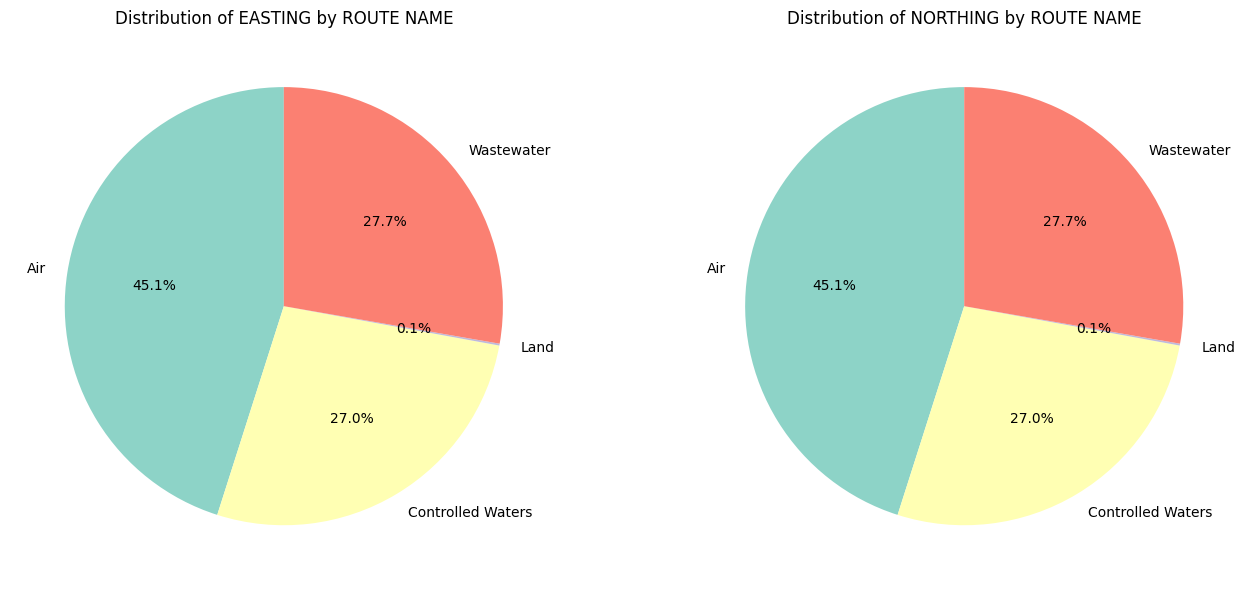

In [13]:
# 1. Use pie charts to analyze the quantitative relationship of `ROUTE NAME' to `EASTING' and `NORTHING'.
route_easting_northing = data[['ROUTE NAME', 'EASTING', 'NORTHING']].dropna()

# Calculate the number of 'EASTINGs' and 'NORTHINGs' for each 'ROUTE NAME'.
easting_counts = route_easting_northing.groupby('ROUTE NAME')['EASTING'].count()
northing_counts = route_easting_northing.groupby('ROUTE NAME')['NORTHING'].count()

# Drawing pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.pie(easting_counts, labels=easting_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(easting_counts)))
ax1.set_title('Distribution of EASTING by ROUTE NAME')


ax2.pie(northing_counts, labels=northing_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(northing_counts)))
ax2.set_title('Distribution of NORTHING by ROUTE NAME')

plt.tight_layout()
plt.show()

/var/folders/0r/l5kq89qs22ng4205cpxqnt680000gn/T/ipykernel_86183/913821437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=route_counts.index, y=route_counts.values, palette="muted")


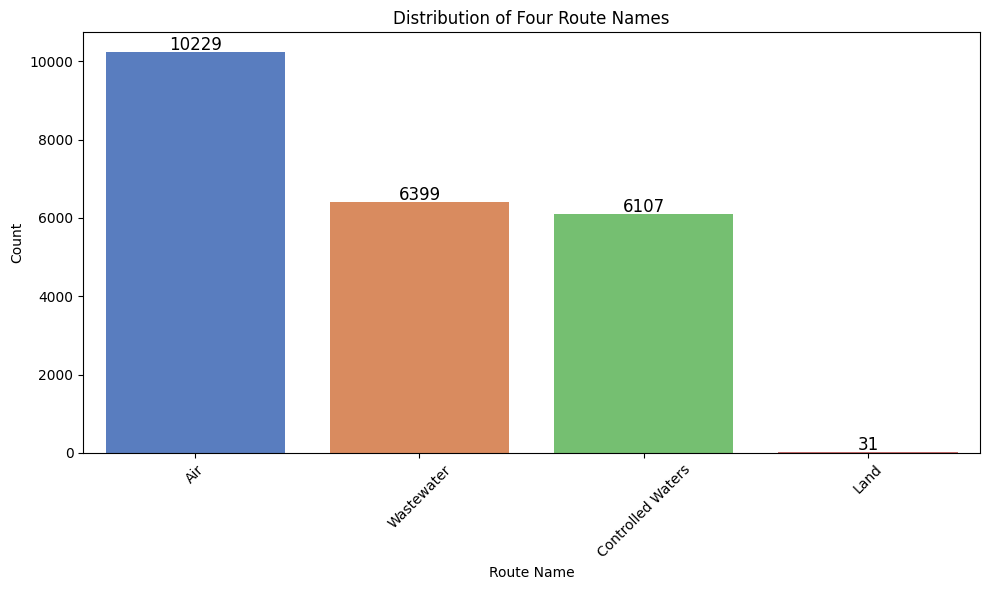

In [16]:
# 2. Use a bar chart to show the distribution of the four forms in `ROUTE NAME'.
route_counts = data['ROUTE NAME'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=route_counts.index, y=route_counts.values, palette="muted")
plt.title('Distribution of Four Route Names')
plt.xlabel('Route Name')
plt.ylabel('Count')
plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

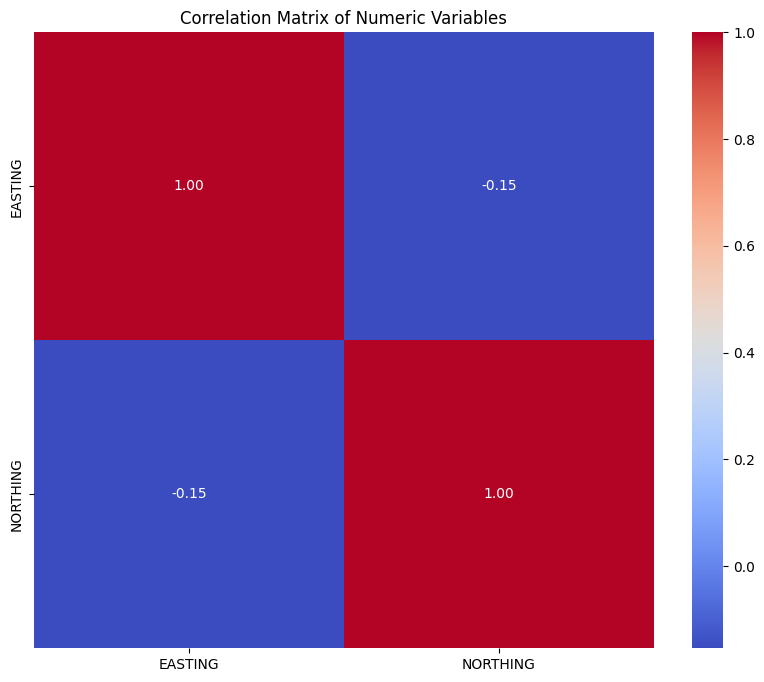

In [15]:
# 3. Correlation of ROUTE NAME with each variable

correlation_matrix = data[numeric_columns].corr()

# 热力图：显示相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


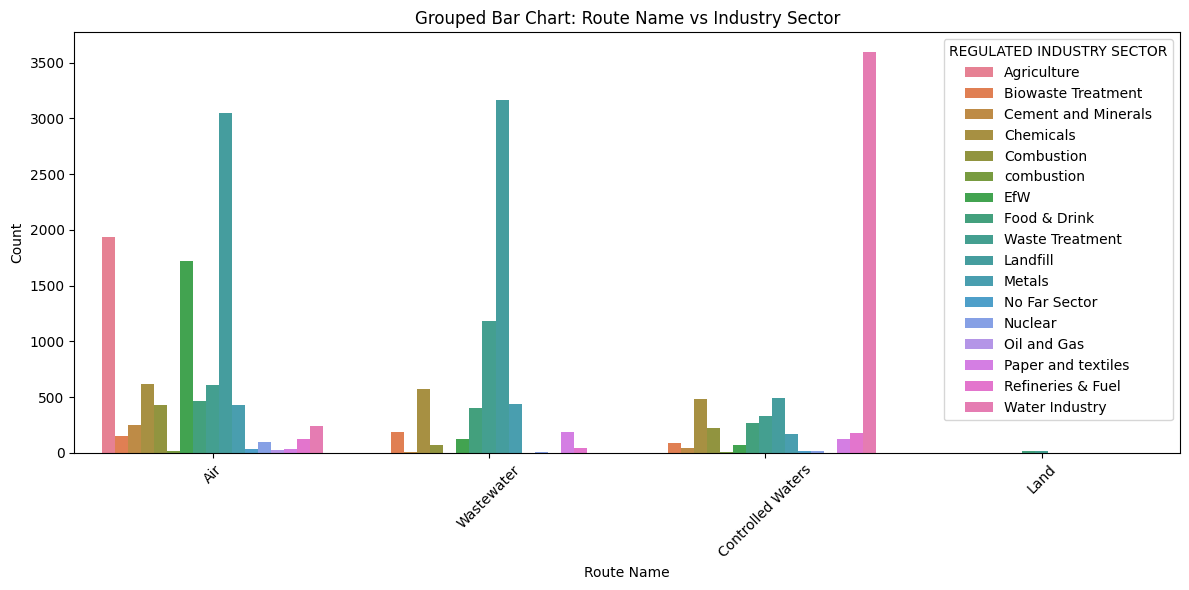

In [17]:

plt.figure(figsize=(12, 6))
sns.countplot(x='ROUTE NAME', hue='REGULATED INDUSTRY SECTOR', data=data)
plt.title('Grouped Bar Chart: Route Name vs Industry Sector')
plt.xlabel('Route Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

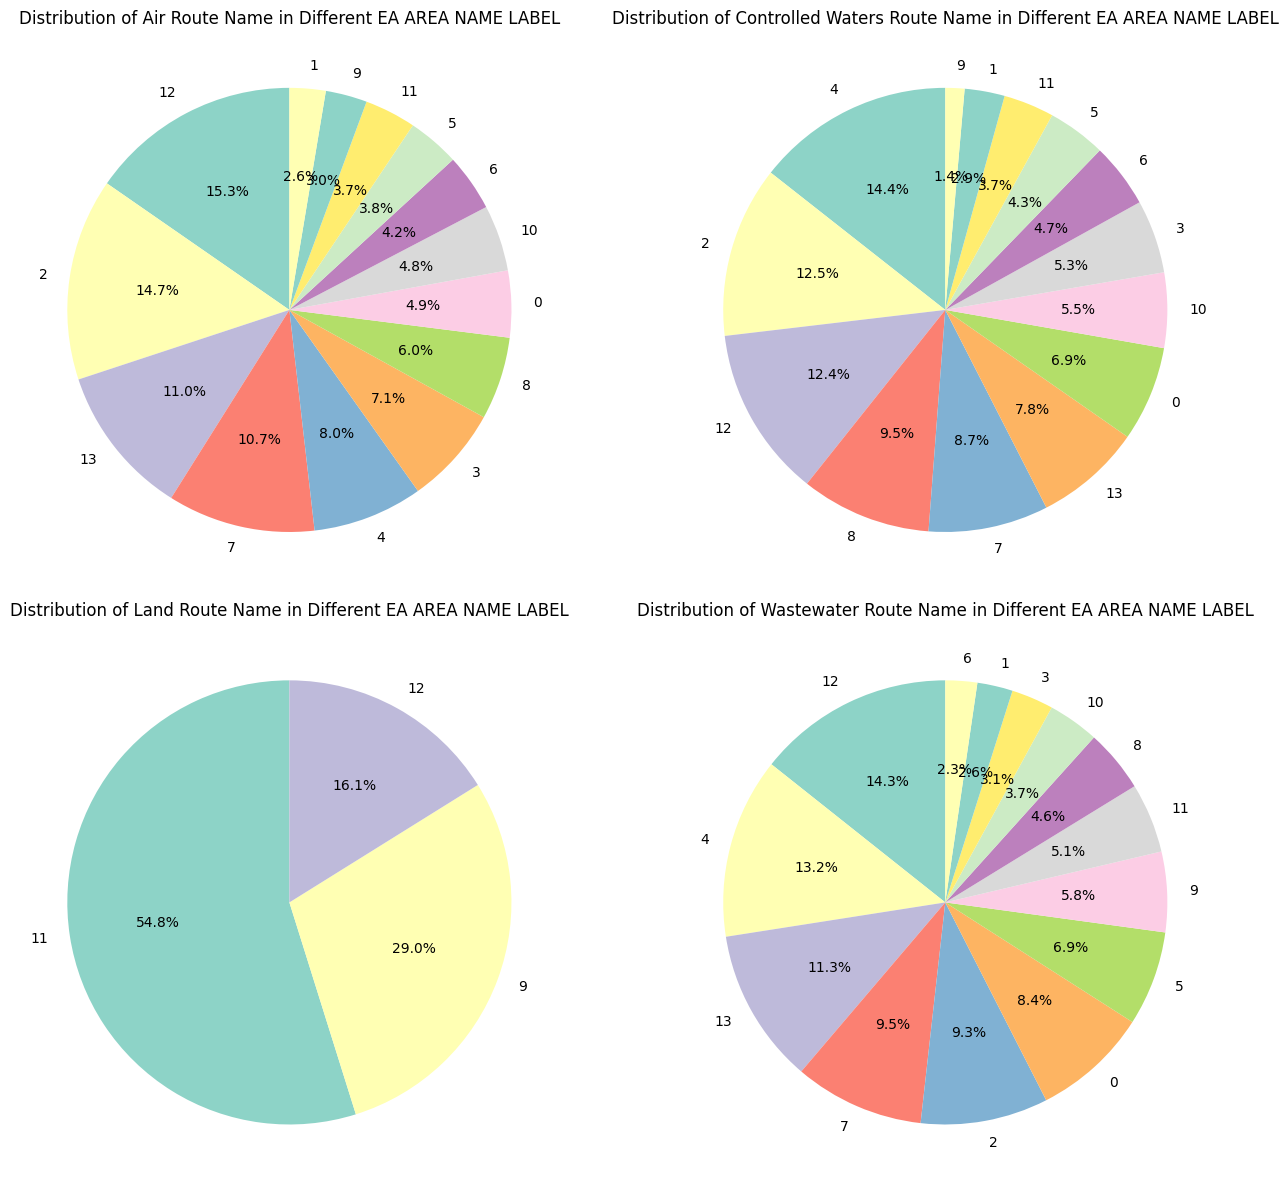

In [40]:

fig, axes = plt.subplots(2, 2, figsize=(14, 12))


route_names = ['Air', 'Controlled Waters', 'Land', 'Wastewater']

# Analyze each ROUTE NAME
for i, route in enumerate(route_names):

    route_data = data[data['ROUTE NAME'] == route]
    
    ea_area_counts = route_data['EA AREA NAME LABEL'].value_counts()

    ax = axes[i // 2, i % 2]
    ax.pie(ea_area_counts, labels=ea_area_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(ea_area_counts)))
    ax.set_title(f'Distribution of {route} Route Name in Different EA AREA NAME LABEL')

plt.tight_layout()
plt.show()